# Outline

SKLearn Wine Dataset...

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
wine_ds = datasets.load_wine(return_X_y=False, as_frame=True)
dir(wine_ds)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
print(wine_ds.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Targets

In [4]:
print(wine_ds.target_names)

['class_0' 'class_1' 'class_2']


In [5]:
wine_ds.target.shape

(178,)

In [6]:
labels, counts = np.unique(wine_ds.target, return_counts=True)
print("Target class counts:")
for count, label in zip(counts, labels):
    print(f"\tclass {label} \t {count}")

Target class counts:
	class 0 	 59
	class 1 	 71
	class 2 	 48


# Features

In [7]:
display(wine_ds.data.sample(10))
display(wine_ds.data.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


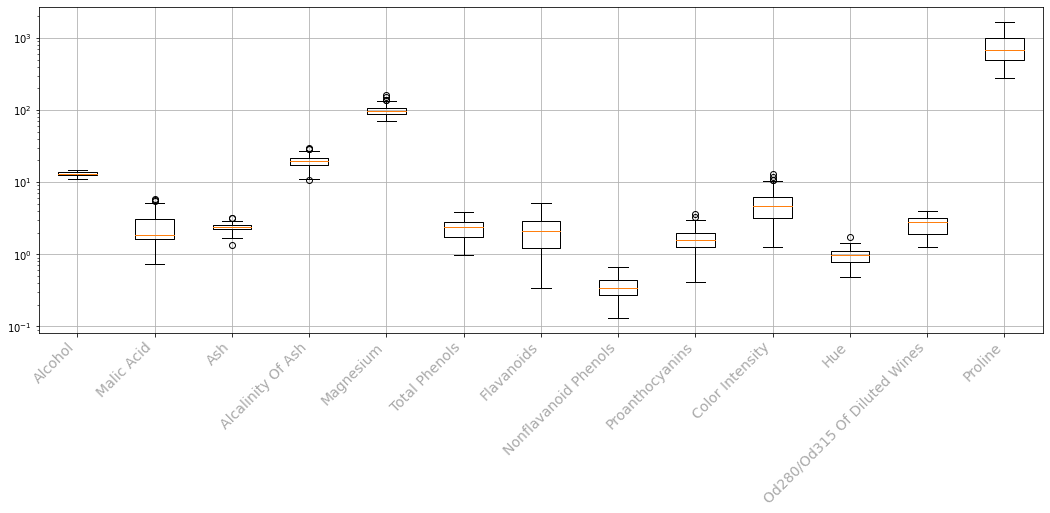

In [8]:
fig = plt.figure(figsize=(18., 6.))
plt.boxplot(wine_ds.data.to_numpy())
column_names = [x.replace("_", " ").title() for x in wine_ds.data.columns]
_ticks = 1 + np.arange(len(column_names))
plt.xticks(_ticks, column_names, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.grid()
plt.gca().set_axisbelow(True)
plt.yscale("log")
plt.show()

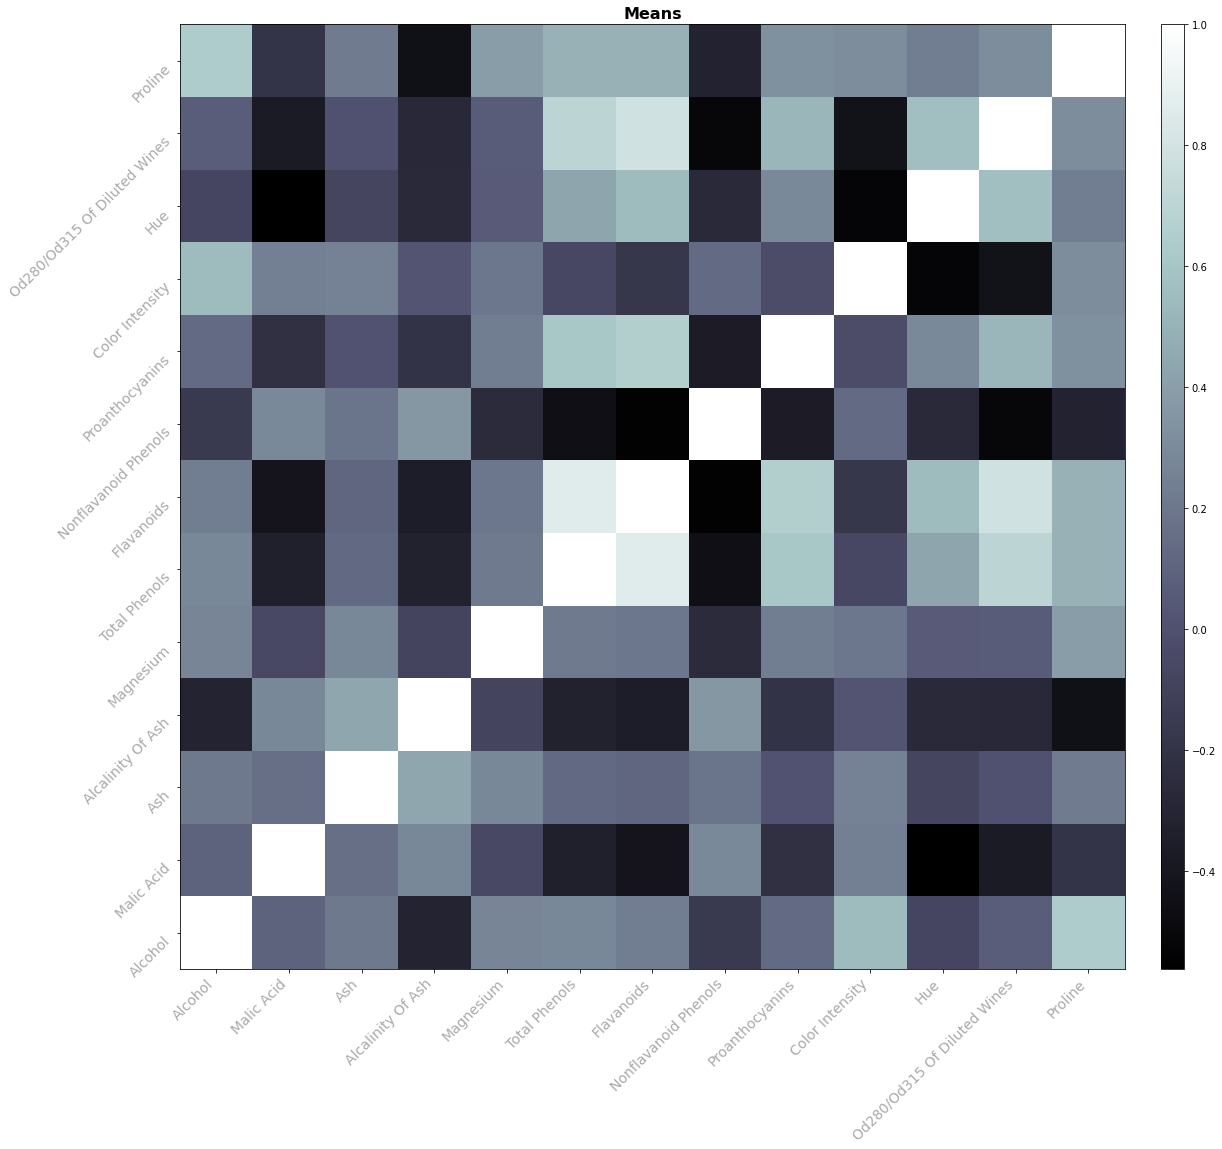

In [9]:
corr_mat = wine_ds.data.corr()

_ticks = np.arange(corr_mat.shape[0])
_labels = [name.replace("_", " ").title() for name in wine_ds.data.columns]

fig = plt.figure(figsize=(18., 18.))
#
plt.title("Means", fontsize=16, fontweight="bold")
im = plt.imshow(corr_mat, cmap="bone", origin="lower")
plt.xticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.yticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="2.5%", pad=0.5)
plt.colorbar(im, cax=cax)
#
plt.show()

<br><br><br>

# Classification using Random Forest

In [10]:
X = wine_ds.data.to_numpy() 
y = wine_ds.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [11]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='gini', 
    max_depth=4, 
    min_samples_split=5, 
    min_samples_leaf=3, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5)

## Train Set Performance:

In [12]:
pred_y = rf_classifier.predict(X_train)
conf_mat = confusion_matrix(y_train, pred_y)
print(f"Train set confusion matrix:\n{conf_mat}")

Train set confusion matrix:
[[39  0  0]
 [ 0 47  0]
 [ 0  0 33]]


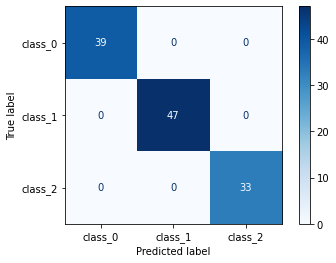

In [13]:
plot_confusion_matrix(
    rf_classifier, X_train, y_train, 
    normalize=None, display_labels=wine_ds.target_names, cmap="Blues")

## Test Set Performance:

In [14]:
pred_y = rf_classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, pred_y)
print(f"Train set confusion matrix:\n{conf_mat}")

Train set confusion matrix:
[[20  0  0]
 [ 1 23  0]
 [ 0  0 15]]


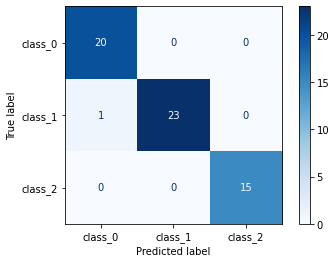

In [15]:
plot_confusion_matrix(
    rf_classifier, X_test, y_test, 
    normalize=None, display_labels=wine_ds.target_names, cmap="Blues")

<br><br><br>

# Classification using DNN

## Normalize Feature Values:

In [16]:
X = wine_ds.data.to_numpy() 
y = wine_ds.target

# Normalize X:
X = X - np.mean(X, axis=0)[np.newaxis, :]
X = X / np.std(X, axis=0)[np.newaxis, :]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
X_train.shape

(119, 13)

## Construct Model:

In [18]:
inputs = tf.keras.Input(shape=(13,), name="features")
x = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(16, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(3, activation="softmax", name="predictions")(x)

classfier_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="classifier_model")

classfier_model.summary()

Model: "classifier_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
predictions (Dense)          (None, 3)                 51        
Total params: 1,987
Trainable params: 1,987
Non-trainable params: 0
_________________________________________________________________


## Compile and Fit Model:

In [19]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, name="cross_entropy")
metric = tf.keras.metrics.SparseCategoricalAccuracy(name="acuracy")

classfier_model.compile(
    optimizer=optimizer, loss=loss, metrics=[metric])

In [20]:
classfier_model.fit(
    X_train,
    y_train,
    batch_size=8,
    epochs=10,
    shuffle=True)

Epoch 1/10
15/15 [==============================] - 0s 813us/step - loss: 0.9325 - acuracy: 0.5735
Epoch 2/10
15/15 [==============================] - 0s 819us/step - loss: 0.6652 - acuracy: 0.8731
Epoch 3/10
15/15 [==============================] - 0s 710us/step - loss: 0.4821 - acuracy: 0.9227
Epoch 4/10
15/15 [==============================] - 0s 703us/step - loss: 0.3449 - acuracy: 0.9631
Epoch 5/10
15/15 [==============================] - 0s 673us/step - loss: 0.2572 - acuracy: 0.9655
Epoch 6/10
15/15 [==============================] - 0s 737us/step - loss: 0.2002 - acuracy: 0.9332
Epoch 7/10
15/15 [==============================] - 0s 636us/step - loss: 0.1403 - acuracy: 0.9568
Epoch 8/10
15/15 [==============================] - 0s 662us/step - loss: 0.1179 - acuracy: 0.9888
Epoch 9/10
15/15 [==============================] - 0s 644us/step - loss: 0.0967 - acuracy: 0.9978
Epoch 10/10
15/15 [==============================] - 0s 632us/step - loss: 0.0674 - acuracy: 1.0000


## Train Set Confusion Matrix:

In [21]:
y_pred = np.argmax(classfier_model.predict(X_train), axis=1)
conf_mat = confusion_matrix(y_train, y_pred)
print(f"Test set confusion matrix:\n{conf_mat}")

Test set confusion matrix:
[[39  0  0]
 [ 0 47  0]
 [ 0  0 33]]


## Test Set Confusion Matrix:

In [22]:
y_pred = np.argmax(classfier_model.predict(X_test), axis=1)
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Test set confusion matrix:\n{conf_mat}")

Test set confusion matrix:
[[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]
